In [ ]:
import convml_tt
from convml_tt.system import TripletTrainerModel, TripletTrainerDataModule
from convml_tt.data.examples import fetch_example_dataset, ExampleData, fetch_pretrained_model, PretrainedModel
from convml_tt.data.dataset import TileType, ImageSingletDataset
from convml_tt.utils import get_embeddings
import convml_tt.interpretation

import numpy as np
import xarray as xr

import pytorch_lightning as pl

convml_tt.__version__

In [3]:
#dataset_path = "c:/Users/Ray/Documents/convml_tt/tmp"
dataset_path = "c:/Users/Ray/Documents/NC/EURE4CA/tmp/"
tile_dataset = ImageSingletDataset(data_dir=dataset_path, tile_type=TileType.ANCHOR)

In [9]:
model_path = fetch_pretrained_model(pretrained_model=PretrainedModel.FIXED_NORM_STAGE2, data_dir="../../")
model_resnet = TripletTrainerModel.load_from_checkpoint(checkpoint_path="c:/Users/Ray/Documents/Stage/MODELS/swift-haze.ckpt")
model_resnet34 = TripletTrainerModel.load_from_checkpoint(checkpoint_path="c:/Users/Ray/Documents/Stage/MODELS/brisk-plant.ckpt") 
model_leif = TripletTrainerModel.load_from_checkpoint(checkpoint_path="c:/Users/Ray/Documents/Stage/MODELS/checkpt") # TripletTrainerModel.load_from_checkpoint(checkpoint_path="c:/Users/Ray/Downloads/checkpt")


Using downloaded and verified file: ../../fixednorm-stage-2.tgz
Extracting ../../fixednorm-stage-2.tgz to ../../


In [10]:
da_embeddings_leif = get_embeddings(tile_dataset=tile_dataset, model=model_leif)
da_embeddings_resnet = get_embeddings(tile_dataset=tile_dataset, model=model_resnet)
da_embeddings_resnet34 = get_embeddings(tile_dataset=tile_dataset, model=model_resnet34)


100%|██████████| 7/7 [00:17<00:00,  2.45s/it]


In [5]:
da_embeddings.to_netcdf("embeddings_example.nc")

<AxesSubplot:>

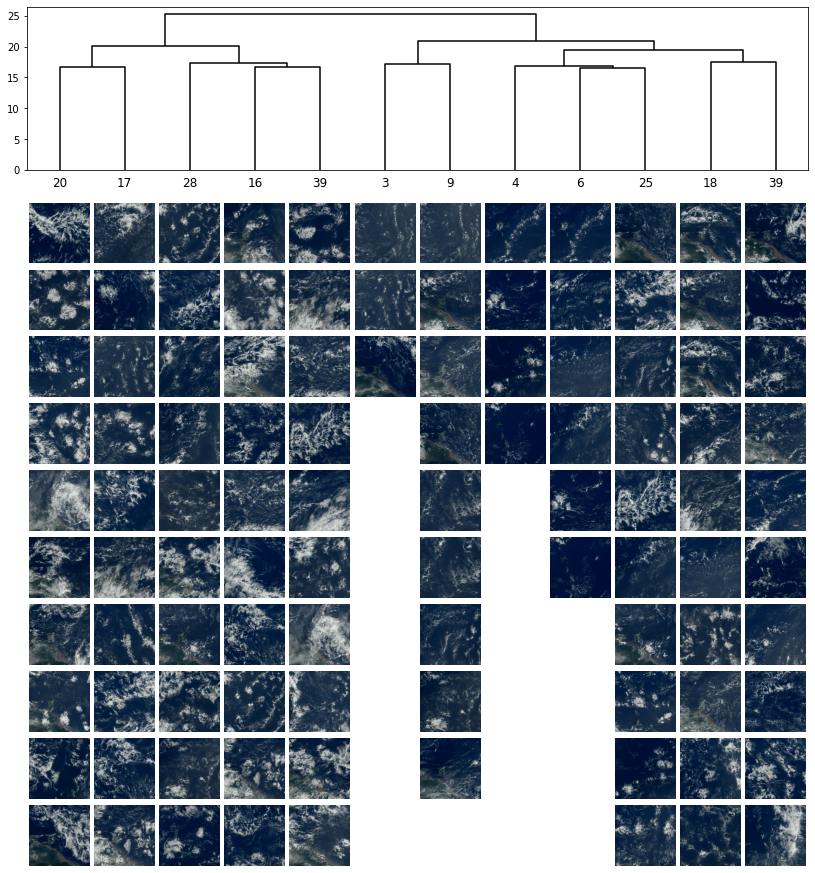

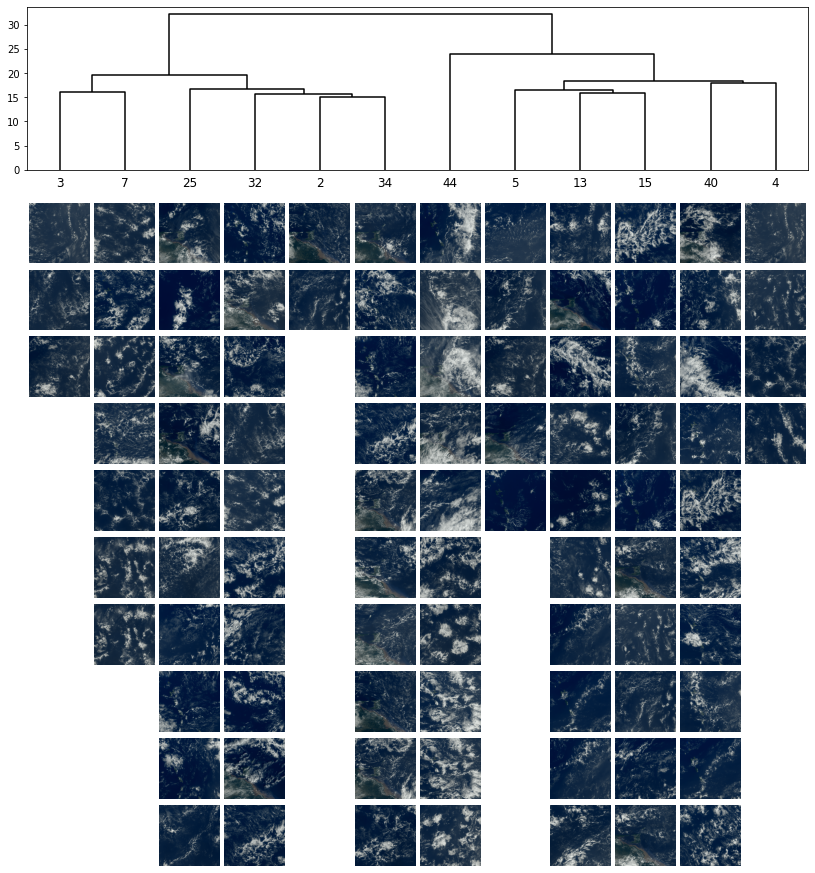

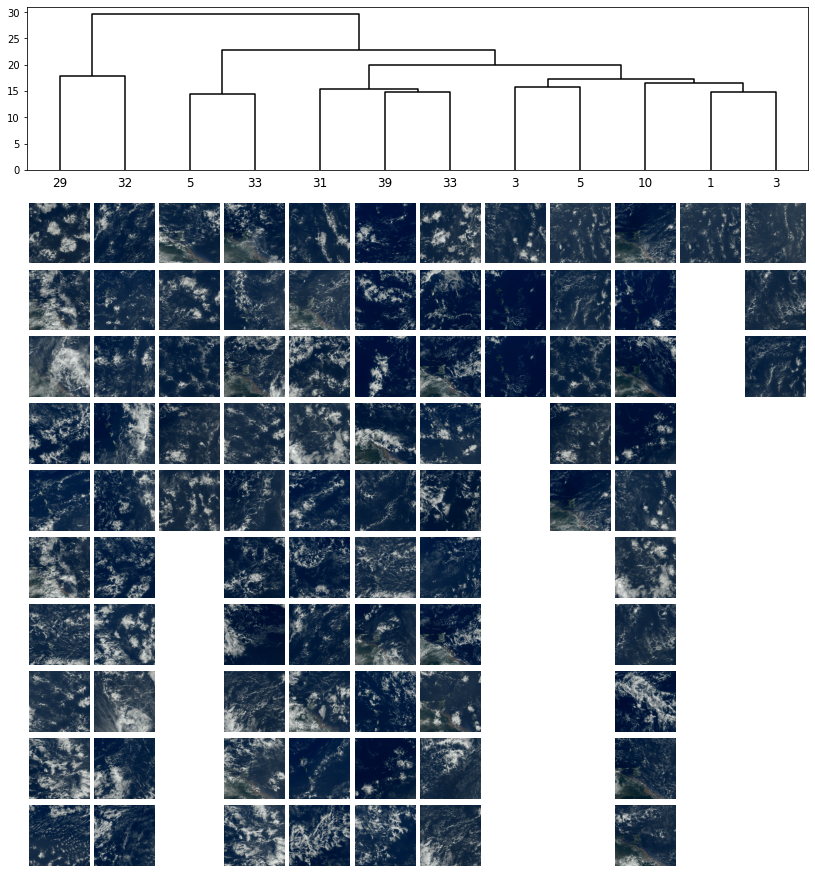

In [12]:
convml_tt.interpretation.plots.dendrogram(da_embeddings_leif, n_samples=10, n_clusters_max=12)
convml_tt.interpretation.plots.dendrogram(da_embeddings_resnet, n_samples=10, n_clusters_max=12)
convml_tt.interpretation.plots.dendrogram(da_embeddings_resnet34, n_samples=10, n_clusters_max=12)

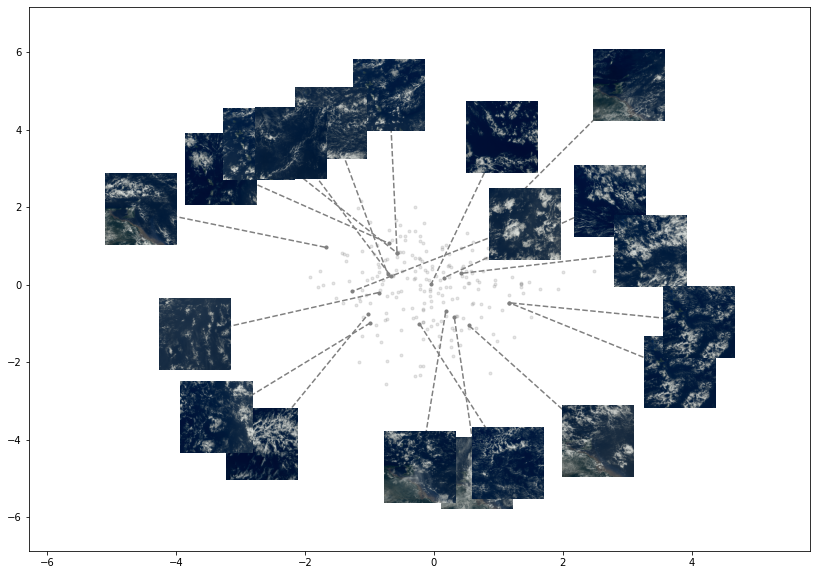

In [15]:
import numpy as np
import matplotlib.pyplot as plt
x = da_embeddings.sel(emb_dim=0)
y = da_embeddings.sel(emb_dim=1)
#fig, ax = plt.subplots(figsize=(8,6))
ax = None
_ = convml_tt.interpretation.plots.annotated_scatter_plot(x=x, y=y, points=20, ax=ax)

In [16]:
x = da_embeddings.sel(emb_dim=0)
y = da_embeddings.sel(emb_dim=1)

points = (np.array([-0.01, 0., 0.01]), np.array([-0.01, 0., 0.01]))

convml_tt.interpretation.plots.annotated_scatter_plot(x=x, y=y, points=points)

c:\Users\Ray\Documents\convml_tt\convml_tt\interpretation\plots\mpl_autopos_annotation\forces.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = x / scaling + 0.5


ValueError: Points cannot contain NaN

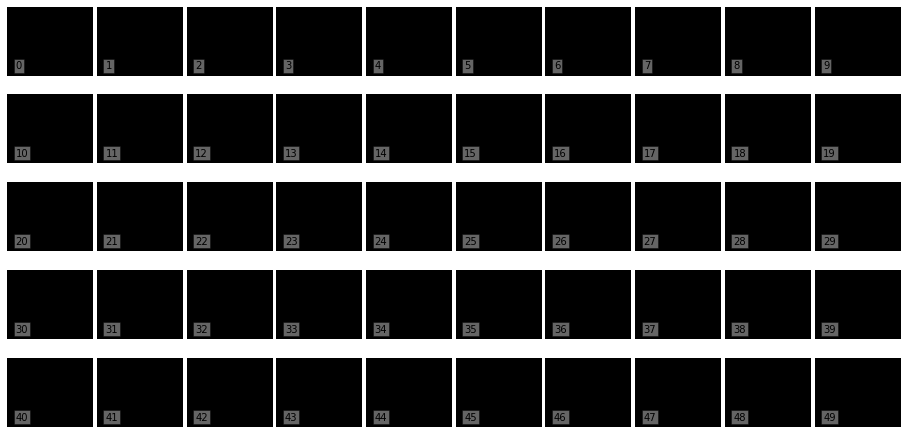

In [9]:
convml_tt.interpretation.plots.grid_overview(tile_dataset, points=50)

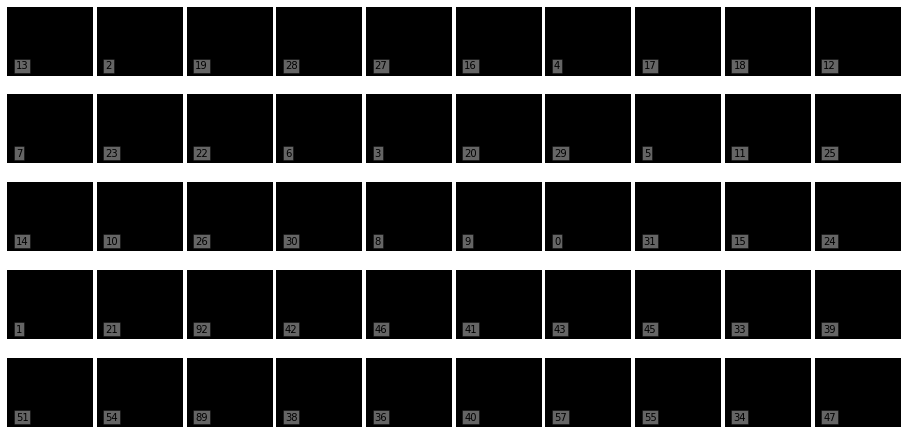

In [10]:
# can be used to for studying a ranking too
def get_dist_to_tile(tile_id, da_):
    dist = np.linalg.norm(da_.sel(tile_id=tile_id) - da_, axis=0)
    return xr.DataArray(dist, coords=dict(tile_id=da_.tile_id), dims=('tile_id',))
    
da_embeddings['dist1'] = get_dist_to_tile(13, da_embeddings)
tile_ids = da_embeddings.sortby('dist1').tile_id.values[:50]

convml_tt.interpretation.plots.grid_overview(tile_dataset, points=tile_ids)